## (1) Install Python Packages (Run Once)

Run the section below to install needed Python packages

In [1]:
import sys
!{sys.executable} -m pip install -r requirements.txt


[notice] A new release of pip is available: 23.0.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


## (2) Edit Tool Configuration and Execute
### (2.0) Available configurations

| Electrode model | Geometry |       | 20 µm | 30 µm | 40 µm | 40-lg µm | 75 µm | 100 µm | 100-lg µm |
|:---------------:|:--------:|:-----:|:-----:|:-----:|:-----:|:--------:|:-----:|:------:|:---------:|
|  **Monopolar**  |   Flat   | Human |   ✅   |   ⚠️   |   ✅   |     ⚠️    |   ⚠️   |   ⚠️    |     ⚠️     |
|  **Monopolar**  |   Flat   |  Rat  |   ✅   |   ⚠️   |   ✅   |     ❌    |   ⚠️   |    ⚠️   |     ⚠️     |
|   **Bipolar**   |   Flat   | Human |   ❌   |   ❌   |   ❌   |     ❌    |   ✅   |    ✅   |     ✅     |
|   **Bipolar**   |   Flat   |  Rat  |   ❌   |   ❌   |   ❌   |     ❌    |   ⚠️   |    ✅   |     ✅     |
|   **Bipolar**   |  Pillar  | Human |   ⚠️   |   ⚠️   |   ✅   |     ⚠️    |   ?    |     ?    |      ?     |
|   **Bipolar**   |  Pillar  |  Rat  |   ❌   |   ⚠️   |   ⚠️   |     ❌    |   ?   |     ?     |      ?     |

**Legend:**
- ✅ - The files exist
- ⚠️ - The files do not exist, but the configuration is possible
- ❌ - The files do not exist and the configuration does not make sense


### (2.1) Generating or loading a video sequence

You can choose to load pre-existing pattern by setting `generate_pattern = False` and providing the video sequence name.
Or you can generate a new video sequence by specifiying the patterns following the hierarchical structure:

- `ProjectionSequence()`
    - `Frames()`
        - `Subframes()`
            - `Patterns()`

Each level has its own parameters and contains a list of the lower-level strucutre. Please, do not forget to provide a video sequence name even if you generate a new one. 

Additional example are provided at the bottom. 

## (3) Flat human bipolar PS100
### (3.1) Video parameters

In [2]:
import os
import numpy as np
from run_stages.pattern_generation_stage import Text, Grating, Rectangle, Circle, FullField, Subframe, Frame, ProjectionSequence

generate_pattern = True
#video_sequence_name = ["input_sample_8"]

### Simple Landolt C
duration = 9.8
intensity = 1
frequency = 30
subframes= [Subframe(duration_ms=duration, patterns=[Text(text='C')]),
                 Subframe(duration_ms=((1/frequency)*1E3-duration), patterns=[FullField('black')])]

list_of_frames = [Frame(name="Landolt_C_PS100", repetitions=1, subframes=subframes)]

list_projections = [ProjectionSequence(intensity_mW_mm2=intensity, frequency_Hz=frequency, frames=list_of_frames)]
video_sequence_name = [f"Landolt_C_PS100_{frequency}Hz_2"]

### (3.2) Other configuration settings

[2024-07-09 09:38:37] INFO       run_rpsim        Staring a new run
[2024-07-09 09:38:37] INFO       run_rpsim        Output directory: c:\Users\Swan\Desktop\RPSim\user_files\user_output\09_38_37-2024_07_09
[2024-07-09 09:38:37] INFO       run_rpsim        Requested run stages: ['pattern_generation', 'resistive_mesh', 'current_sequence', 'circuit', 'simulation', 'post_process', 'plot_results']
[2024-07-09 09:38:37] INFO       run_rpsim        Running the following configuration
+-------------------------------------+-------------------------------------------------------------------------------------------------------------------------------+
| model                               | bipolar                                                                                                                       |
| pixel_size                          | 100                                                                                                                           |
| pixel_size_

Processing Z-slice: 160 of time point 1/1: 100%|██████████| 160/160 [10:34<00:00,  3.96s/it]


[2024-07-09 09:49:22] INFO       run_rpsim        Running Plot_Results Stage
[2024-07-09 09:49:23] INFO       run_rpsim        Finished running all provided configurations
[2024-07-09 09:49:23] INFO       run_rpsim        Execution time is 10.76 minutes


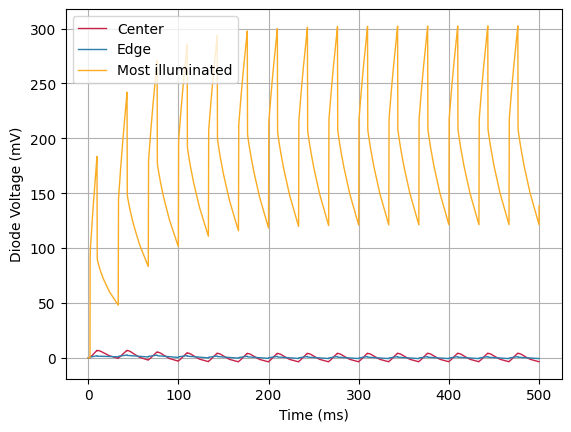

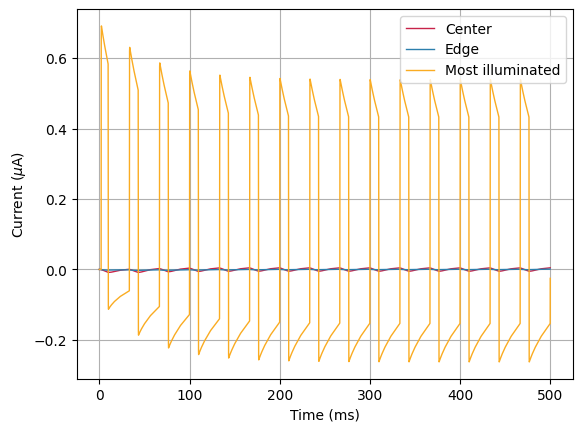

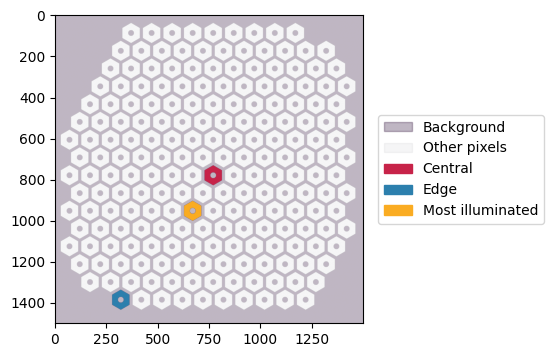

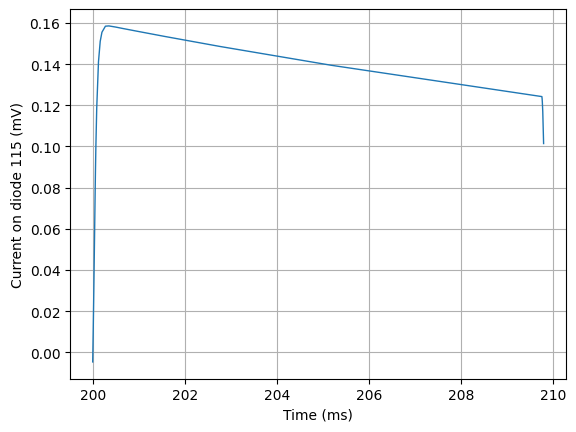

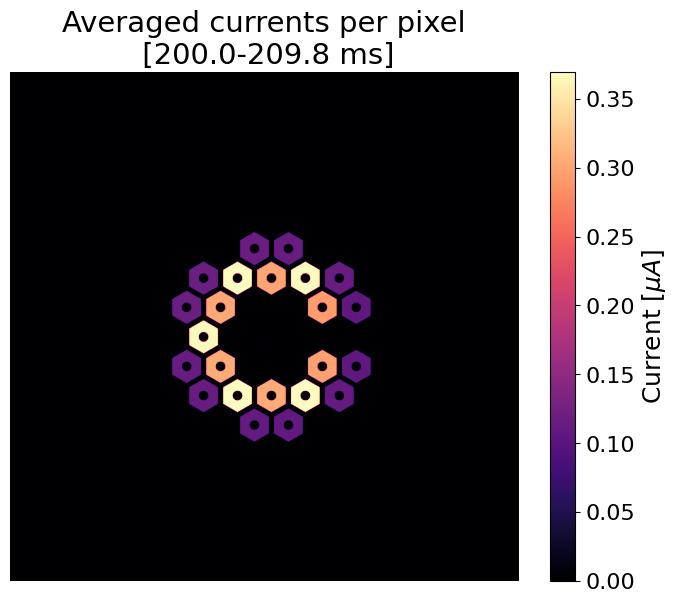

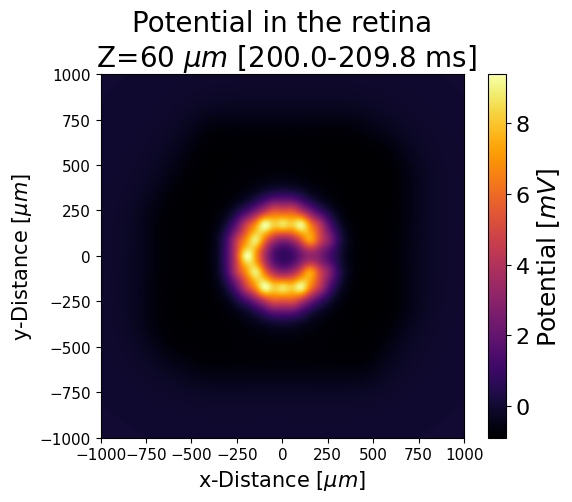

In [3]:
### PRIMA CONFIGURATION

configuration = {}

# geometry-defined configuration
configuration["model"]                            = "bipolar"     # model geometry: monopolar or bipolar
configuration["pixel_size"]                       = 100           # pixel size
configuration["pixel_size_suffix"]                = ""         # If large format is required, use "-lg", else use ""
configuration["frame_width"]                      = 1000       # implant radius in mm
configuration["geometry"]                         = "Flat_human"  # geometry settings: HC/Pillar/Flat devices in
# pdish/rat/human
configuration["number_of_diodes"]                 = 2             # number of photo diodes per pixel
configuration["sirof_capacitance"]                = 6             # SIROF capacitance in mF/cm^2
configuration["photosensitive_area_edge_to_edge"] = 92           # edge-to-edge size of the photosensitive area
configuration["active_electrode_radius"]          = 17            # radius of the active electrode in um
configuration["light_to_current_conversion_rate"] = 0.4           # light to current conversion rate in A/W
configuration["photosensitive_area"]              = 4075.72       # total photosensitive area in um^2. Assign "None" for
# auto calculation (only works for monopolar)

# R matrix parameters
configuration["r_matrix_output_file"]             = f'R_{configuration["geometry"]}_PS{configuration["pixel_size"]}{configuration["pixel_size_suffix"]}.pkl' 
configuration["r_matrix_conductivity"]            = 1             # conductivity scaling factor of the electrolyte

# dynamic simulation configuration
configuration["Ipho_scaling"]                     = 1  # artificial scaling of photo current, useful for
                                                     # parametric sweep (e.g. S-D curve)
configuration["Isat"]                             = 0.02          # diode saturation current in pA
configuration["ideality_factor"]                  = 1.14          # ideality factor n of the diode
configuration["shunt_resistance"]                 = 790150.0     # shunt resistance in Ohm. Assign "None" if no
# shunt
configuration["initial_Vactive"]                  = 0          # Initial bias of the active electrode in V
configuration["temperature"]                      = 37
configuration["nominal_temperature"]              = 25
# TODO make sure that the duration is sufficiently long compared to the frequencz, i.e. at least 6 times the period
configuration["simulation_duration_sec"]          = 1/frequency * 15             # simulation duration in seconds
configuration["simulation_resolution_ms"]         = None          # None defaults to Xyce inner value

# input paths
configuration["user_files_path"]                  = None          # If set to None, defaults to inner user_files directory
configuration["pixel_label_input_file"]           = f'image_sequence/pixel_label_PS{configuration["pixel_size"]}{configuration["pixel_size_suffix"]}.pkl'

#### Projection sequences related ####

configuration["video_sequence_name"]              = video_sequence_name
configuration["pattern_generation"]               = {"generate_pattern": generate_pattern}
if generate_pattern:
    tmp = \
        {
        "projection_sequences"              : list_projections,
        "font_path"                         : None, # If set to None for, defaults to optometrist font Sloan.otf
        "projection_sequences_stored_config" : None # Used for storing the config, but part of the skipped parameters
        }
    configuration["pattern_generation"].update(tmp)

# define input files for monopolar arrays
configuration["monopolar"] = \
    {
    "return_to_active_area_ratio": 5.7525,              # ratio between return area and total active area 
    "r_matrix_simp_ratio": 0.1,
    "r_matrix_input_file_px_pos": f'r_matrix/COMSOL_results/PS{configuration["pixel_size"]}{configuration["pixel_size_suffix"]}_pos.csv',
    "r_matrix_input_file_active": f'r_matrix/COMSOL_results/{configuration["geometry"]}/{configuration["geometry"]}_PS{configuration["pixel_size"]}_UCD_active.csv',
    "r_matrix_input_file_EP_return_2D": f'r_matrix/COMSOL_results/{configuration["geometry"]}/{configuration["geometry"]}_PS{configuration["pixel_size"]}_EP_return_2D-whole.csv',
    "r_matrix_input_file_diagonal": f'r_matrix/COMSOL_results/{configuration["geometry"]}/{configuration["geometry"]}_PS{configuration["pixel_size"]}_EP_self.csv', # used for resistive mesh only
    "r_matrix_input_file_non_diagonal": f'r_matrix/COMSOL_results/{configuration["geometry"]}/{configuration["geometry"]}_PS{configuration["pixel_size"]}_EP_Rmat.csv' # used for resistive mesh only
    }

# define input files for bipolar arrays
bipolar_dict = \
    {
    "additional_edges": 142,                                     # bipolar only: edge segments of the return
    "r_matrix_simp_ratio": 0.1,
    "r_matrix_input_file_px_pos": f'r_matrix/COMSOL_results/PS{configuration["pixel_size"]}{configuration["pixel_size_suffix"]}_pos.csv',
    "r_matrix_input_file_active": f'r_matrix/COMSOL_results/{configuration["geometry"]}/{configuration["geometry"]}_PS{configuration["pixel_size"]}_UCD_active.csv',
    "r_matrix_input_file_return": f'r_matrix/COMSOL_results/{configuration["geometry"]}/{configuration["geometry"]}_PS{configuration["pixel_size"]}_UCD_return.csv',
    "r_matrix_input_file_return_neighbor": f'r_matrix/COMSOL_results/{configuration["geometry"]}/{configuration["geometry"]}_PS{configuration["pixel_size"]}_UCD_return_neighbor.csv', # used for resistive mesh only
    }
if configuration["model"] == 'bipolar': # Special file existing only for the bipolar PS100 and PS75 configurations
        bipolar_dict["r_matrix_input_file_return_near"] = f'r_matrix/COMSOL_results/{configuration["geometry"]}/{configuration["geometry"]}_PS{configuration["pixel_size"]}_UCD_return_near.csv'

configuration["bipolar"] = bipolar_dict

# post-process parameters
configuration["post_process"] = \
    {
    "pulse_start_time_in_ms": (1/frequency)*1e3 * 6, # Set to 200 ms if frequency is not defined
    "pulse_duration_in_ms": 9.8,
    # Related to the time dynamics analyzis
    "average_over_pulse_duration": True,
    "pulse_extra_ms": 0,
    "time_averaging_resolution_ms": 1,
    "interpolation_resolution_ms": 1e-3,
    # For improving computations speed, warning it may crash for sume configurations!
    "multiprocessing": False,
    "cpu_to_use": None, # If set to None, automatically uses 2/3 of the cpu available
    # Related to spatial analyzis 
    "depth_values_in_um": None, # if None, defaults to all available in model otherwise use list of list: [[0,1,5,50,155]]
    "on_diode_threshold_mV": 50
    }

configuration["plot_results"] = \
    {
    "plot_time_windwow_start_ms": 200.0, # If set to None, selects the post proces stage values
    "plot_time_window_end_ms": 209.8,
    "plot_potential_depth_um": 60
    }

### EXECUTION
from RPSim import run_rpsim
# Stages name: "pattern_generation" - "resistive_mesh" - "current_sequence" - "circuit" - "simulation" - "post_process" - "plot_results"
run_stages = [ "pattern_generation", "resistive_mesh", "current_sequence", "circuit", "simulation", 'post_process', 'plot_results']
run_rpsim(configuration=configuration, run_stages=run_stages)#, skip_stages="post_process")

## (4) Flat rat - Monopolar - PS40
### (4.1) Projection settings

In [ ]:
import os
import numpy as np
from run_stages.pattern_generation_stage import Text, Grating, Rectangle, Circle, FullField, Subframe, Frame, ProjectionSequence

generate_pattern = True

### Simple full field for MP40 rat ###
duration = 5
intensity = 0.2
frequency = 2
subframes= [Subframe(duration_ms=duration, patterns=[FullField('white')]),
                 Subframe(duration_ms=((1/frequency)*1E3-duration), patterns=[FullField('black')])]

list_of_frames = [Frame(name="FF_SD_{}ms_{}mW".format(duration, intensity), repetitions=1, subframes=subframes)]

video_sequence_name = ["MP40_rat_FF_SD_{}ms_{}mW".format(duration, intensity)]
list_projections = [ProjectionSequence(intensity_mW_mm2=intensity, frequency_Hz=frequency, frames=list_of_frames)]*len(video_sequence_name)

### (4.2) Other configuration settings

In [ ]:
## MP40 RAT CONFIGURATION

configuration = {}

# geometry-defined configuration
configuration["model"]                            = "monopolar"     # model geometry: monopolar or bipolar
configuration["pixel_size"]                       = 40           # pixel size
configuration["pixel_size_suffix"]                = ""         # If large format is required, use "-lg", else use ""
configuration["frame_width"]                      = 750       # implant radius in mm
configuration["geometry"]                         = "Flat_rat"  # geometry settings: HC/Pillar/Flat devices in
# pdish/rat/human
configuration["number_of_diodes"]                 = 1             # number of photo diodes per pixel
configuration["sirof_capacitance"]                = 6             # SIROF capacitance in mF/cm^2
configuration["photosensitive_area_edge_to_edge"] = 36           # edge-to-edge size of the photosensitive area
configuration["active_electrode_radius"]          = 9            # radius of the active electrode in um
configuration["light_to_current_conversion_rate"] = 0.5           # light to current conversion rate in A/W
configuration["photosensitive_area"]              = 867.8999183638593   # total photosensitive area in um^2. Assign
# "None" for
# auto calculation

# R matrix parameters
configuration["r_matrix_output_file"]             = f'R_{configuration["geometry"]}_PS{configuration["pixel_size"]}{configuration["pixel_size_suffix"]}.pkl'
configuration["r_matrix_conductivity"]            = 1             # conductivity scaling factor of the electrolyte

# dynamic simulation configuration
configuration["Ipho_scaling"]                     = 1  # artificial scaling of photo current, useful for
                                                     # parametric sweep (e.g. S-D curve)
configuration["Isat"]                             = 0.3          # diode saturation current in pA
configuration["ideality_factor"]                  = 1.5          # ideality factor n of the diode
configuration["shunt_resistance"]                 = None         # shunt resistance in Ohm. Assign "None" if no shunt
configuration["initial_Vactive"]                  = 0.4          # Initial bias of the active electrode in V
configuration["temperature"]                      = 37
configuration["nominal_temperature"]              = 25
configuration["simulation_duration_sec"]          = 3             # simulation duration in seconds
configuration["simulation_resolution_ms"]         = None          # None defaults to Xyce inner value

# input paths
configuration["user_files_path"]                  = None          # If set to None, defaults to inner user_files directory
configuration["pixel_label_input_file"]           = f'image_sequence/pixel_label_PS{configuration["pixel_size"]}{configuration["pixel_size_suffix"]}.pkl'

#### Projection sequences related ####

configuration["video_sequence_name"]              = video_sequence_name

configuration["pattern_generation"]               = {"generate_pattern": generate_pattern}
add_projection_seq = any(generate_pattern) if type(generate_pattern) is list else generate_pattern
if add_projection_seq:
    tmp = \
        {
        "projection_sequences"              : list_projections,
        "font_path"                         : None, # If set to None for, defaults to optometrist font Sloan.otf
        "projection_sequences_stored_config" : None # Used for storing the config, but part of the skipped parameters
        }
    configuration["pattern_generation"].update(tmp)

# define input files for monopolar arrays
configuration["monopolar"] = \
    {
    "return_to_active_area_ratio": 5.7525,              # ratio between return area and total active area 
    "r_matrix_simp_ratio": 0.1,
    "r_matrix_input_file_px_pos": f'r_matrix/COMSOL_results/PS{configuration["pixel_size"]}{configuration["pixel_size_suffix"]}_pos.csv',
    "r_matrix_input_file_active": f'r_matrix/COMSOL_results/{configuration["geometry"]}/{configuration["geometry"]}_PS{configuration["pixel_size"]}_UCD_active.csv',
    "r_matrix_input_file_EP_return_2D": f'r_matrix/COMSOL_results/{configuration["geometry"]}/{configuration["geometry"]}_PS{configuration["pixel_size"]}_EP_return_2D-whole.csv',
    "r_matrix_input_file_diagonal": f'r_matrix/COMSOL_results/{configuration["geometry"]}/{configuration["geometry"]}_PS{configuration["pixel_size"]}_EP_self.csv', # used for resistive mesh only
    "r_matrix_input_file_non_diagonal": f'r_matrix/COMSOL_results/{configuration["geometry"]}/{configuration["geometry"]}_PS{configuration["pixel_size"]}_EP_Rmat.csv' # used for resistive mesh only
    }

# define input files for bipolar arrays
bipolar_dict = \
    {
    "additional_edges": 142,                                     # bipolar only: edge segments of the return
    "r_matrix_simp_ratio": 0.1,
    "r_matrix_input_file_px_pos": f'r_matrix/COMSOL_results/PS{configuration["pixel_size"]}{configuration["pixel_size_suffix"]}_pos.csv',
    "r_matrix_input_file_active": f'r_matrix/COMSOL_results/{configuration["geometry"]}/{configuration["geometry"]}_PS{configuration["pixel_size"]}_UCD_active.csv',
    "r_matrix_input_file_return": f'r_matrix/COMSOL_results/{configuration["geometry"]}/{configuration["geometry"]}_PS{configuration["pixel_size"]}_UCD_return.csv',
    "r_matrix_input_file_return_neighbor": f'r_matrix/COMSOL_results/{configuration["geometry"]}/{configuration["geometry"]}_PS{configuration["pixel_size"]}_UCD_return_neighbor.csv', # used for resistive mesh only
    }
if configuration["model"] == 'bipolar': # Special file existing only for the bipolar PS100 and PS75 configurations
        bipolar_dict["r_matrix_input_file_return_near"] = f'r_matrix/COMSOL_results/{configuration["geometry"]}/{configuration["geometry"]}_PS{configuration["pixel_size"]}_UCD_return_near.csv'

configuration["bipolar"] = bipolar_dict

# post-process parameters
configuration["post_process"] = \
    {
    "pulse_start_time_in_ms": 2500, #(1/frequency)*1e3, # TODO this could be automated, or made smaller
    "pulse_duration_in_ms": 8,
    # Related to the time dynamics analyzis
    "average_over_pulse_duration": False,
    "pulse_extra_ms": 0,
    "time_averaging_resolution_ms": 1,
    "interpolation_resolution_ms": 1e-3,
    # For improving computations speed, warning it may crash for sume configurations!
    "multiprocessing": False,
    "cpu_to_use": None, # If set to None, automatically uses 2/3 of the cpu available
    # Related to spatial analyzis 
    "depth_values_in_um": None, #[[0, 45, 77, 86, 109, 142]], # if None, defaults to all available in model
    "on_diode_threshold_mV": 50
    }

configuration["plot_results"] = \
    {
    "plot_time_windwow_start_ms": 200.0, # If set to None, selects the post proces stage values
    "plot_time_window_end_ms": 209.8,
    "plot_potential_depth_um": 60
    }


### EXECUTION
from RPSim import run_rpsim
# Stages name: "pattern_generation" - "resistive_mesh" - "current_sequence" - "circuit" - "simulation" - "post_process" - "plot_results"
run_stages = [ "pattern_generation", "resistive_mesh", "current_sequence", "circuit", "simulation", "post_process", "plot_results"]
run_rpsim(configuration=configuration, run_stages=run_stages)#, skip_stages="post_process")

## (5) MP20 Degenerated Long Evans Rat


In [ ]:
import os
import numpy as np
from run_stages.pattern_generation_stage import Text, Grating, Rectangle, Circle, FullField, Subframe, Frame, ProjectionSequence

generate_pattern = True

duration = 10
intensities = [0.06, 0.12]
frequency = 2
name_template = "MP20_DG_LE_FF_{}Hz_{}ms_{}mW"
video_sequence_name = list()
list_projections = list()

subframes= [Subframe(duration_ms=duration, patterns=[FullField('white')]),
            Subframe(duration_ms=((1/frequency)*1E3-duration), patterns=[FullField('black')])]

for intensity in intensities:

    list_of_frames = [Frame(name=name_template.format(frequency, duration, intensity), repetitions=1, subframes=subframes)]
    list_projections.append(ProjectionSequence(intensity_mW_mm2=intensity, frequency_Hz=frequency, frames=list_of_frames))

    video_sequence_name.append(name_template.format(frequency, duration, intensity))

In [ ]:
import os
import numpy as np
from run_stages.pattern_generation_stage import Text, Grating, Rectangle, Circle, FullField, Subframe, Frame, ProjectionSequence

generate_pattern = True
#video_sequence_name = ["input_sample_8"]

### Simple Landolt C
duration = 9.8
intensity = 1
frequency = 30
subframes= [Subframe(duration_ms=duration, patterns=[Text(text='C', gap_size=6)]),
                 Subframe(duration_ms=((1/frequency)*1E3-duration), patterns=[FullField('black')])]

list_of_frames = [Frame(name="Landolt_C_PS20", repetitions=1, subframes=subframes)]

list_projections = [ProjectionSequence(intensity_mW_mm2=intensity, frequency_Hz=frequency, frames=list_of_frames)]
video_sequence_name = [f"Landolt_C_PS100_{frequency}Hz_2"]

In [ ]:
## MP20 RAT CONFIGURATION

configuration = {}

# geometry-defined configuration
configuration["model"]                            = "monopolar"     # model geometry: monopolar or bipolar
configuration["pixel_size"]                       = 20           # pixel size
configuration["pixel_size_suffix"]                = ""         # If large format is required, use "-lg", else use ""
configuration["frame_width"]                      = 750       # implant radius in mm
configuration["geometry"]                         = "Flat_rat"  # geometry settings: HC/Pillar/Flat devices in
# pdish/rat/human
configuration["number_of_diodes"]                 = 1             # number of photo diodes per pixel
configuration["sirof_capacitance"]                = 6             # SIROF capacitance in mF/cm^2
configuration["photosensitive_area_edge_to_edge"] = 16           # edge-to-edge size of the photosensitive area
configuration["active_electrode_radius"]          = 4.5            # radius of the active electrode in um
configuration["light_to_current_conversion_rate"] = 0.5           # light to current conversion rate in A/W
configuration["photosensitive_area"]              = 158.085252133623   # total photosensitive area in um^2. Assign
# "None" for
# auto calculation

# R matrix parameters
configuration["r_matrix_output_file"]             = f'R_{configuration["geometry"]}_PS{configuration["pixel_size"]}{configuration["pixel_size_suffix"]}.pkl'
configuration["r_matrix_conductivity"]            = 1             # conductivity scaling factor of the electrolyte

# dynamic simulation configuration
configuration["Ipho_scaling"]                     = 1  # artificial scaling of photo current, useful for
                                                     # parametric sweep (e.g. S-D curve)
configuration["Isat"]                             = 0.3          # diode saturation current in pA
configuration["ideality_factor"]                  = 1.5          # ideality factor n of the diode
configuration["shunt_resistance"]                 = None         # shunt resistance in Ohm. Assign "None" if no shunt
configuration["initial_Vactive"]                  = 0.4          # Initial bias of the active electrode in V
configuration["temperature"]                      = 37
configuration["nominal_temperature"]              = 25
configuration["simulation_duration_sec"]          = 2.0             # simulation duration in seconds
configuration["simulation_resolution_ms"]         = None          # None defaults to Xyce inner value

# input paths
configuration["user_files_path"]                  = None          # If set to None, defaults to inner user_files directory
configuration["pixel_label_input_file"]           = f'image_sequence/pixel_label_PS{configuration["pixel_size"]}{configuration["pixel_size_suffix"]}.pkl'

#### Projection sequences related ####

configuration["video_sequence_name"]              = video_sequence_name

configuration["pattern_generation"]               = {"generate_pattern": generate_pattern}
add_projection_seq = any(generate_pattern) if type(generate_pattern) is list else generate_pattern
if add_projection_seq:
    tmp = \
        {
        "projection_sequences"              : list_projections,
        "font_path"                         : None, # If set to None for, defaults to optometrist font Sloan.otf
        "projection_sequences_stored_config" : None # Used for storing the config, but part of the skipped parameters
        }
    configuration["pattern_generation"].update(tmp)

# define input files for monopolar arrays
configuration["monopolar"] = \
    {
    "return_to_active_area_ratio": 4.0876,              # ratio between return area and total active area 
    "r_matrix_simp_ratio": 0.1,
    "r_matrix_input_file_px_pos": f'r_matrix/COMSOL_results/PS{configuration["pixel_size"]}{configuration["pixel_size_suffix"]}_pos.csv',
    "r_matrix_input_file_active": f'r_matrix/COMSOL_results/{configuration["geometry"]}/{configuration["geometry"]}_PS{configuration["pixel_size"]}_UCD_active.csv',
    "r_matrix_input_file_EP_return_2D": f'r_matrix/COMSOL_results/{configuration["geometry"]}/{configuration["geometry"]}_PS{configuration["pixel_size"]}_EP_return_2D-whole.csv',
    "r_matrix_input_file_diagonal": f'r_matrix/COMSOL_results/{configuration["geometry"]}/{configuration["geometry"]}_PS{configuration["pixel_size"]}_EP_self.csv', # used for resistive mesh only
    "r_matrix_input_file_non_diagonal": f'r_matrix/COMSOL_results/{configuration["geometry"]}/{configuration["geometry"]}_PS{configuration["pixel_size"]}_EP_Rmat.csv' # used for resistive mesh only
    }

# define input files for bipolar arrays
bipolar_dict = \
    {
    "additional_edges": 142,                                     # bipolar only: edge segments of the return
    "r_matrix_simp_ratio": 0.1,
    "r_matrix_input_file_px_pos": f'r_matrix/COMSOL_results/PS{configuration["pixel_size"]}{configuration["pixel_size_suffix"]}_pos.csv',
    "r_matrix_input_file_active": f'r_matrix/COMSOL_results/{configuration["geometry"]}/{configuration["geometry"]}_PS{configuration["pixel_size"]}_UCD_active.csv',
    "r_matrix_input_file_return": f'r_matrix/COMSOL_results/{configuration["geometry"]}/{configuration["geometry"]}_PS{configuration["pixel_size"]}_UCD_return.csv',
    "r_matrix_input_file_return_neighbor": f'r_matrix/COMSOL_results/{configuration["geometry"]}/{configuration["geometry"]}_PS{configuration["pixel_size"]}_UCD_return_neighbor.csv', # used for resistive mesh only
    }
if configuration["model"] == 'bipolar': # Special file existing only for the bipolar PS100 and PS75 configurations
        bipolar_dict["r_matrix_input_file_return_near"] = f'r_matrix/COMSOL_results/{configuration["geometry"]}/{configuration["geometry"]}_PS{configuration["pixel_size"]}_UCD_return_near.csv'

configuration["bipolar"] = bipolar_dict

# post-process parameters
configuration["post_process"] = \
    {
    "pulse_start_time_in_ms": (1/frequency)*1e3*2, # TODO this could be automated, or made smaller
    "pulse_duration_in_ms": duration,
    # Related to the time dynamics analyzis
    "average_over_pulse_duration": True,
    "pulse_extra_ms": 0,
    "time_averaging_resolution_ms": 1,
    "interpolation_resolution_ms": 1e-3,
    # For improving computations speed, warning it may crash for sume configurations!
    "multiprocessing": False,
    "cpu_to_use": None, # If set to None, automatically uses 2/3 of the cpu available
    # Related to spatial analyzis 
    "depth_values_in_um": [[45]], #[[0, 45, 77, 86, 109, 142]], # if None, defaults to all available in model
    "on_diode_threshold_mV": 50
    }

configuration["plot_results"] = \
    {
    "plot_time_windwow_start_ms": 200.0, # If set to None, selects the post proces stage values
    "plot_time_window_end_ms": 209.8,
    "plot_potential_depth_um": 60
    }


### EXECUTION
from RPSim import run_rpsim
# Stages name: "pattern_generation" - "resistive_mesh" - "current_sequence" - "circuit" - "simulation" - "post_process" - "plot_results"
run_stages = [ "pattern_generation", "resistive_mesh", "current_sequence", "circuit", "simulation", "post_process", "plot_results"]
run_stages = [ "plot_results"]
run_rpsim(configuration=configuration, run_stages=run_stages)#, skip_stages="post_process")

## Additional projection sequences examples

Example of a more complex sequence combining text, shapes and gratings.

In [ ]:
generate_pattern = True
video_sequence_name = ["shapes_texts_gratings"]
intensity = 1 # mW/mm^2
frequency = 10 # Hz


text_shapes_subframes = [
    Subframe(duration_ms=15, patterns=[Text(position=(0, 0), rotation=0, unit="pixel", text="C", gap_size = 1.5)]),
    Subframe(duration_ms=15, patterns=[Rectangle(position=(950, 250), rotation=45, unit="um", width=75, height=75),
                                    Rectangle(position=(-2, 5), rotation=45, unit="pixel", width=0.75, height=0.75)]),
    Subframe(duration_ms=15, patterns=[Circle(position=(950, 1300), unit="um", diameter=150),
                                    Circle(position=(-2, -5.5), unit="pixel", diameter=1.5)]),
    Subframe(duration_ms=30, patterns=[Text((250, 750), 90, "THIS IS \n\nA SIMPLE TEST.", unit="um", letter_size=100),
                                    Text((5.5, 0), -90, "THIS IS \nA SIMPLE TEST.", unit="pixel", letter_size=1), 
                                    ]),
    Subframe(duration_ms=10, patterns=[FullField("white")]),
    Subframe(duration_ms=15, patterns=[FullField("black")])

]
grating_subframes = [
    Subframe(duration_ms=35, patterns=[Grating(position=(600, 0), rotation=45, unit="um", width_grating=75, pitch_grating=75)]),
    Subframe(duration_ms=40, patterns=[Grating(position=(0,0), rotation= -60, unit="pixel", width_grating=1, pitch_grating=1)]),
    Subframe(duration_ms=25, patterns=[FullField("black")])
]
list_of_frames = [
    Frame(name="00_Text_shapes", repetitions=1, subframes=text_shapes_subframes),
    Frame(name="01_Grating", repetitions=2, subframes=grating_subframes)
]

list_projections = [ProjectionSequence(intensity_mW_mm2=intensity, frequency_Hz=frequency, frames=list_of_frames)]

Nine projection sequences of white full fields

In [ ]:
frequency = 2
durations = [10, 10, 10, 5, 5, 5, 3, 3, 3]
intensities = [0.06, 0.1, 0.12, 0.15, 0.2, 0.5, 0.7, 0.9, 1]

list_projections = []
video_sequence_name = []

for duration, intensity in zip(durations, intensities):
    subframes= [Subframe(duration_ms=duration, patterns=[FullField('white')]),
                Subframe(duration_ms=(500-duration), patterns=[FullField('black')])]

    list_of_frames = [Frame(name="Full_Field_SD_{}ms_{}mW".format(duration, intensity), repetitions=1,
                            subframes=subframes)]

    list_projections.append(ProjectionSequence(intensity_mW_mm2=intensity, frequency_Hz=frequency, frames=list_of_frames))
    video_sequence_name.append("Full_Field_MP40_SD_{}ms_{}mW".format(duration, intensity))

##### Multiplexing tests at 0.3 $mW/mm^2$

In [ ]:
import os
import numpy as np
from run_stages.pattern_generation_stage import Text, Grating, Rectangle, Circle, FullField, Subframe, Frame, ProjectionSequence

generate_pattern = []
video_sequence_name = []
list_projections = []

## Projection 1 - Vertical bars ##

frequency = 2 # Hz
intensity = 0.3 # mW/mm^2 
W = 1500 # The frame width in um
H = 1500 # The frame height in um 

list_subframes = []
list_subframes.append(Subframe(duration_ms=2, patterns=[Rectangle(unit="um", position=(-W/2 + W/8, 0), height=H, width=W/4, rotation=0)]))
list_subframes.append(Subframe(duration_ms=2, patterns=[Rectangle(unit="um", position=(-W/2 + W*3/8, 0), height=H, width=W/4, rotation=0)]))
list_subframes.append(Subframe(duration_ms=2, patterns=[Rectangle(unit="um", position=(W/8, 0), height=H, width=W/4, rotation=0)]))
list_subframes.append(Subframe(duration_ms=2, patterns=[Rectangle(unit="um", position=(W*3/8, 0), height=H, width=W/4, rotation=0)]))
list_subframes.append(Subframe(duration_ms=492, patterns=[FullField("black")]))

list_frames = [Frame(repetitions=1, subframes=list_subframes, name="Vertical bars")]

generate_pattern.append(True)
list_projections.append(ProjectionSequence(frames=list_frames, intensity_mW_mm2=intensity, frequency_Hz=frequency))
video_sequence_name.append("MP40_multiplexed_FF_vertical_bars_0.3mW")

## Projection 2 - Quadrants ## 

list_subframes = []
list_subframes.append(Subframe(duration_ms=2, patterns=[Rectangle(unit="um", position=(W/4, W/4), height=H/2, width=W/2, rotation=0)]))
list_subframes.append(Subframe(duration_ms=2, patterns=[Rectangle(unit="um", position=(-W/4, W/4), height=H/2, width=W/2, rotation=0)]))
list_subframes.append(Subframe(duration_ms=2, patterns=[Rectangle(unit="um", position=(-W/4, -W/4), height=H/2, width=W/2, rotation=0)]))
list_subframes.append(Subframe(duration_ms=2, patterns=[Rectangle(unit="um", position=(W/4, -W/4), height=H/2, width=W/2, rotation=0)]))
list_subframes.append(Subframe(duration_ms=492, patterns=[FullField("black")]))

list_frames = [Frame(repetitions=1, subframes=list_subframes, name="Quadrants")]

generate_pattern.append(True)
list_projections.append(ProjectionSequence(frames=list_frames, intensity_mW_mm2=intensity, frequency_Hz=frequency))
video_sequence_name.append("MP40_multiplexed_FF_quadrants_0.3mW")

## Projection 3 - No multiplexing full fields ## 

list_subframes = []
list_subframes.append(Subframe(duration_ms=8, patterns=[FullField('white')]))
list_subframes.append(Subframe(duration_ms=492, patterns=[FullField('black')]))

list_frames = [Frame(repetitions=1, subframes=list_subframes, name="No multiplexing FF")]

generate_pattern.append(True)
list_projections.append(ProjectionSequence(frames=list_frames, intensity_mW_mm2=intensity, frequency_Hz=frequency))
video_sequence_name.append("MP40_No_multiplexing_FF_0.3mW")

## Projection 4 - Multilexing algorithm ## 

generate_pattern.append(False)
list_projections.append(None)
video_sequence_name.append("MP40_multiplexed_FF_algo_0.3mW")